# DS 3000 - Assignment 7

**Student Name**: Bella Chin

**Date**: 10/15/2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

Load the data into a dataframe. Inspect the data and perform at least one type of data preparation.

In [3]:
# Import necessary libraries
import pandas as pd

# Load the Air Traffic Passenger Statistics into the data frame
air_df = pd.read_csv('Air_Traffic_Passenger_Statistics.csv')


# Print the types of the variables before converting
print("Before converting:\n", air_df.dtypes)

# Convert the variables to their best type
air_df['Operating Airline'] = air_df['Operating Airline'].astype('string')
air_df['Operating Airline IATA Code'] = air_df['Operating Airline IATA Code'].astype('string')
air_df['Published Airline'] = air_df['Published Airline'].astype('string')
air_df['Published Airline IATA Code'] = air_df['Published Airline IATA Code'].astype('string')
air_df['GEO Summary'] = air_df['GEO Summary'].astype('category')
air_df['GEO Region'] = air_df['GEO Region'].astype('category')
air_df['Activity Type Code'] = air_df['Activity Type Code'].astype('category')
air_df['Price Category Code'] = air_df['Price Category Code'].astype('category')
air_df['Terminal'] = air_df['Terminal'].astype('category')
air_df['Boarding Area'] = air_df['Boarding Area'].astype('category')
air_df['Activity Period Start Date'] = air_df['Activity Period Start Date'].astype('datetime64[ns]')

# Print the types of the variables after converting
print("After converting:\n", air_df.dtypes)

# Check for any null values in each column
print(air_df.isnull().sum())

# seeing the percentage of missing values in each column
print(air_df.isnull().mean()*100)

# seeing how many missing values there can be in a single row at any time
print(air_df.isnull().sum(axis=1).sort_values(ascending=False))

# deleting missing data in Operating Airline & Published Airline IATA Code because it only makes up ~0.009% of the data in that column
air_df.dropna(subset=['Operating Airline IATA Code', 'Published Airline IATA Code'], inplace=True)

# checking everything worked
print(air_df.isnull().sum())
print(air_df.isnull().mean()*100)


Before converting:
 Activity Period                 int64
Activity Period Start Date     object
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
data_as_of                     object
data_loaded_at                 object
dtype: object
After converting:
 Activity Period                         int64
Activity Period Start Date     datetime64[ns]
Operating Airline              string[python]
Operating Airline IATA Code    string[python]
Published Airline              string[python]
Published Airline IATA Code    string[python]
GEO Summary                          category
GEO Region                           category
Activity 

## Question 2: 
Determine which terminal has the most passenger traffic and visualize the results. Explain the graph.

        Terminal  Passenger Count
0  International        245498921
1          Other              182
2     Terminal 1        228497563
3     Terminal 2         95244190
4     Terminal 3        415215075
        Terminal  Passenger Count
4     Terminal 3        415215075
0  International        245498921
2     Terminal 1        228497563
3     Terminal 2         95244190
1          Other              182


/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_71732/512851072.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  terminal_traffic = air_df.groupby(['Terminal'], as_index = False)['Passenger Count'].sum()


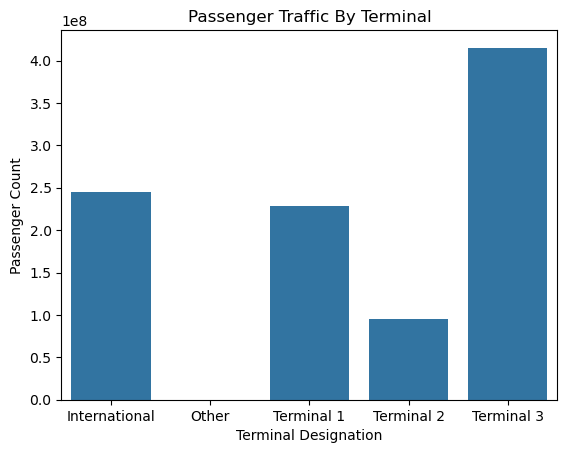

In [5]:
# Get the traffic count for each terminal
terminal_traffic = air_df.groupby(['Terminal'], as_index = False)['Passenger Count'].sum()
print(terminal_traffic)

# Sort the terminals by highest passenger counts to get the most passenger traffic for each terminal
terminal_traffic = terminal_traffic.sort_values('Passenger Count', ascending = False)
print(terminal_traffic)

# Import libraries to graph the chart
import seaborn as sns
import matplotlib.pyplot as plt

# Graph the chart
sns.barplot(x = 'Terminal', y = 'Passenger Count', data = terminal_traffic)
plt.title('Passenger Traffic By Terminal')
plt.xlabel('Terminal Designation')
plt.ylabel('Passenger Count')
plt.show()

This bar chart illustrates the total number of passengers across various airport terminals. The y-axis represents the number of passengers in hundreds of millions, indicating the large amounts of passengers at these terminals. From the chart, it is evident that Terminal 3 has the highest passenger traffic, exceeing 400 million passengers. This is followed by the international terminal and Terminal 1, both of which handles over 200 million passengers each. In contrast, Terminal 2 has the lowest passenger traffic among the listed terminals that can be seen, with a significantly smaller count tha tht International terminal andTterminal 1. The Other category represents additional passenger counts not associated with specific terminals, but it heavily fals below the numbers for the busisest terminals. Although, it is not able to be seen on the chart, as the units are in hundreds of millions, the Other terminal has 356 passengers. This is significantly lower than the lowest terminal that is visible on  the graph. Overall, the chart highlights that Terminal 3 is the busiest, while the Other teriminal is the least.

## Question 3
Plot the annual domestic and international enplanement and deplanement using a line chart. Explain the patterns and discuss which years have the most and least passenger traffic.
Tip: It is recommended that you create two charts; chart #1 for the international travelers and Chart #2 for the domestic travelers. Then in each chart, visualize the number of passengers who enplaned and deplaned each year. The annual passenger enplanement and deplanement should be visualized using separate lines.


<Axes: title={'center': 'Annual International Enplanement & Deplanement'}, xlabel='Year', ylabel='Number of Passengers'>

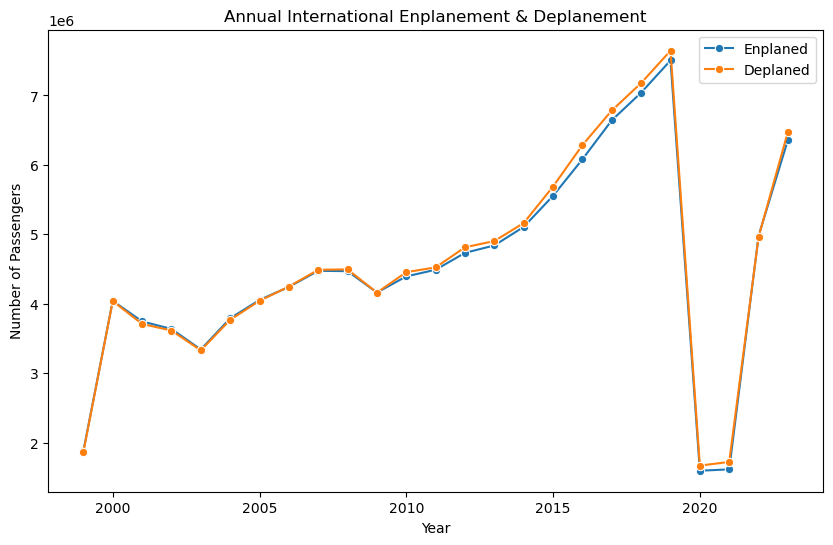

In [8]:
# Create a year column and extract the year from the activity period
air_df['Year'] = air_df['Activity Period Start Date'].dt.year

# Get the data for international travelers
international_df = air_df[air_df['GEO Summary'] == 'International']

# Get the data for enplaned international travelers
enplaned_international_df = international_df[international_df['Activity Type Code'] == 'Enplaned']
enplaned_international_sum = enplaned_international_df.groupby(['Year'])['Passenger Count'].sum().reset_index()
 
# Get the data for deplaned international travelers
deplaned_international_df = international_df[international_df['Activity Type Code'] == 'Deplaned']
deplaned_international_sum = deplaned_international_df.groupby(['Year'])['Passenger Count'].sum().reset_index()


# Plot the annual international enplanement & deplanement
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.lineplot(x = 'Year', y = 'Passenger Count', marker='o',data = enplaned_international_sum, label = 'Enplaned')
plt.ylabel('Number of Passengers')
plt.title('Annual International Enplanement & Deplanement')
sns.lineplot(x = 'Year', y = 'Passenger Count', marker='o', data = deplaned_international_sum, label = 'Deplaned')

The chart shows the annual trends in international enplanement and deplanement of passengers from the late 1990s to 2022. There is steady growth in passenger numbers from 2000 to 2019, peaking in 2019 with over 7 million passengers, reflecting the global rise in air travel internationally. The lines for enplaned and deplaned passengers are closely aligned to the point where they are overlapping, indicating a balance between arrivals and departures. However, 2020 sees a sharp decline, which could be caused by a huge event within the U.S such as COVID-19, which may restrict travel restrictions. There is a partial increase beginning in 2021. Overall, 2019 has the highest passenger traffic, while 2020 marks the lowest.

<Axes: title={'center': 'Annual Domestic Enplanement & Deplanement'}, xlabel='Year', ylabel='Number of Passengers'>

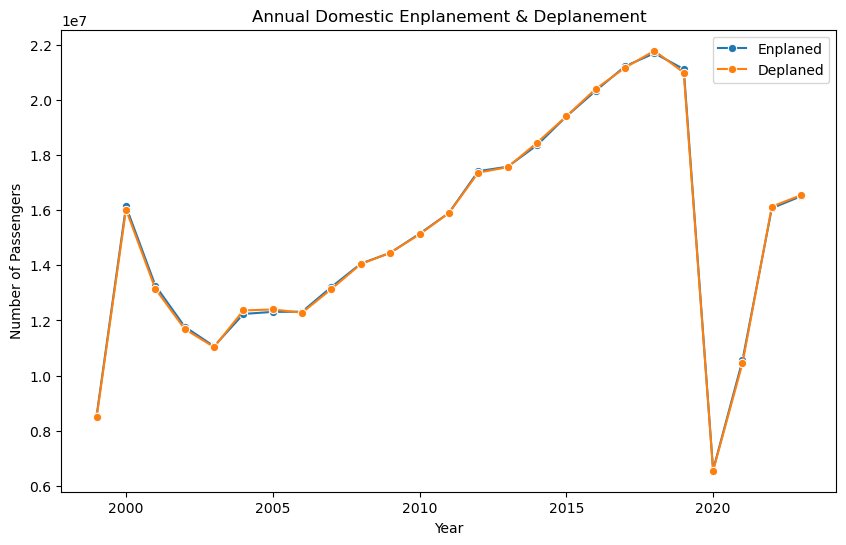

In [10]:
# Get the data for domestic travelers
domestic_df = air_df[air_df['GEO Summary'] == 'Domestic']

# Get the data for enplaned domestic travelers
enplaned_domestic_df = domestic_df[domestic_df['Activity Type Code'] == 'Enplaned']
enplaned_domestic_sum = enplaned_domestic_df.groupby(['Year'])['Passenger Count'].sum().reset_index()
 
# Get the data for deplaned domestic travelers
deplaned_domestic_df = domestic_df[domestic_df['Activity Type Code'] == 'Deplaned']
deplaned_domestic_sum = deplaned_domestic_df.groupby(['Year'])['Passenger Count'].sum().reset_index()


# Plot the annual domestic enplanement & deplanement
plt.figure(figsize=(10, 6))
plt.tight_layout()
sns.lineplot(x = 'Year', y = 'Passenger Count', marker='o',data = enplaned_domestic_sum, label = 'Enplaned')
plt.ylabel('Number of Passengers')
plt.title('Annual Domestic Enplanement & Deplanement')
sns.lineplot(x = 'Year', y = 'Passenger Count', marker='o', data = deplaned_domestic_sum, label = 'Deplaned')

The chart displays the annual trends in domestic enplanement and deplanement of passengers from the late 1990s to 2022. Passenger numbers show growth from around 2000, with a dip in the early 2000s, which could be caused by a event within the country such as 9/11. A steady increase is observed from 2005 onwards, peaking in 2019 with over 2.2 million passengers, reflecting a strong period for domestic air travel. Both enplaned and deplaned passengers closely follow each other, indicating balanced travel flows for domestic flights. However, 2020 exhibits a sharp drop that may be due to the impact of COVID-19, with a partial recovery starting in 2021. The highest passenger traffic occurs in 2019, while the lowest is in 2020.

## Question 4
Demonstrate which airlines contributed to the most passenger traffic over the last 10 years and visualize the results**? Are there changes in the top airlines each year? Ensure that you visualize the top 5 airlines and explain the patterns.


[2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]


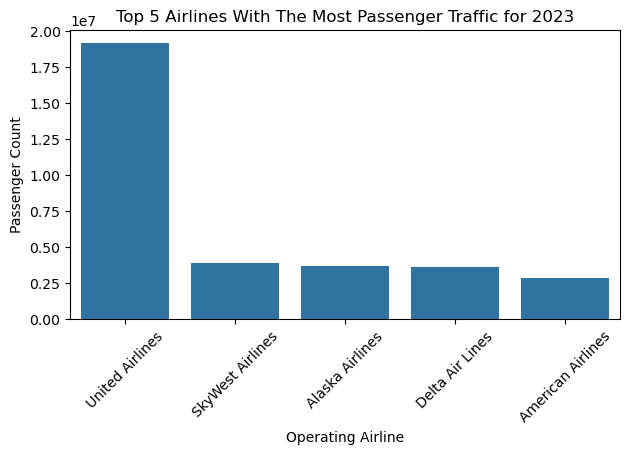

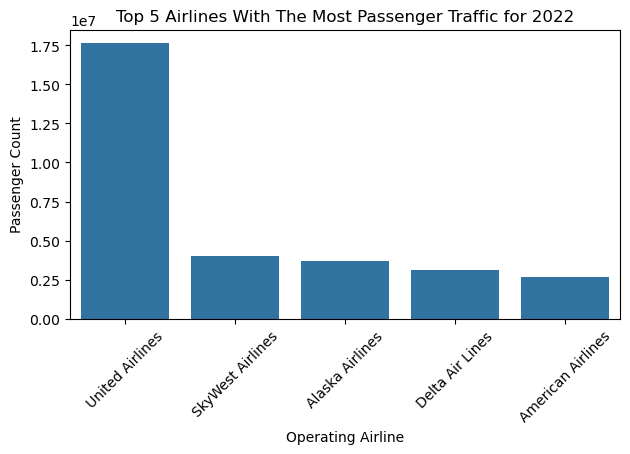

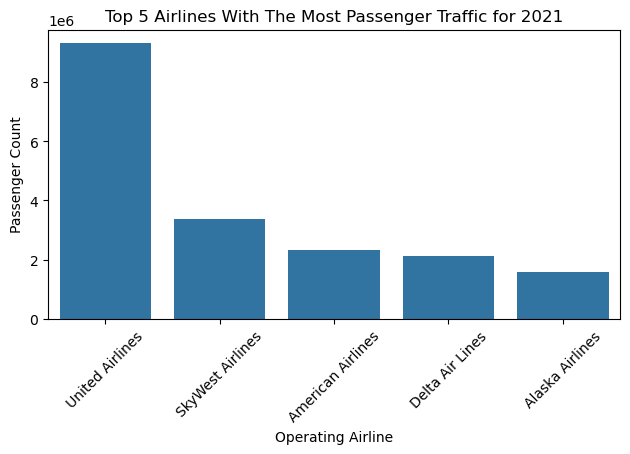

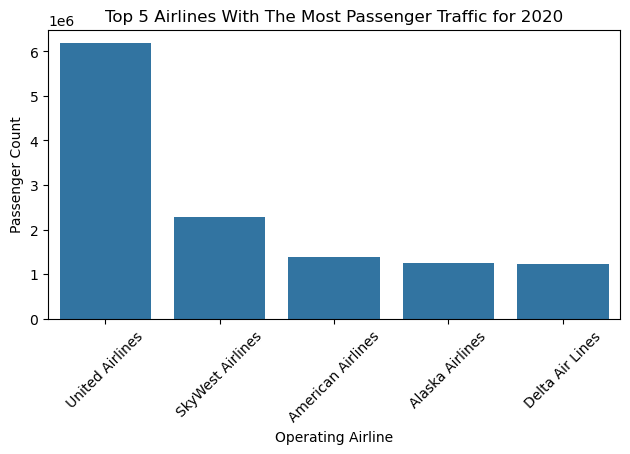

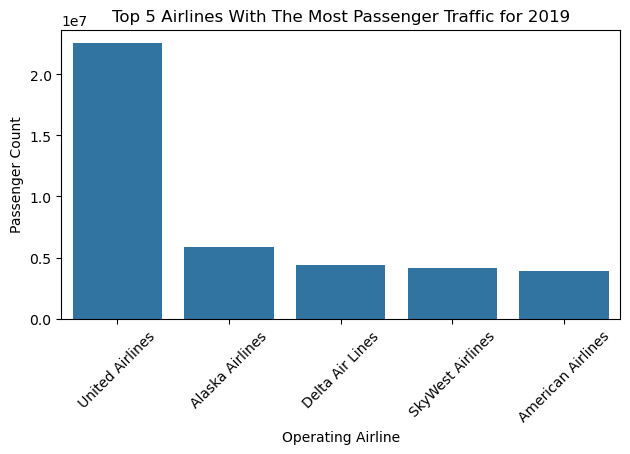

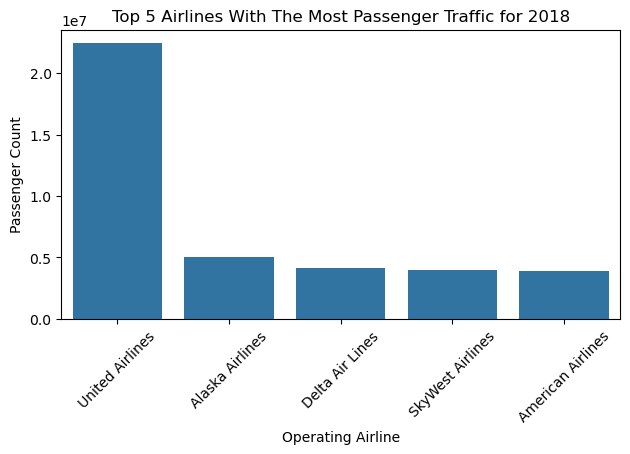

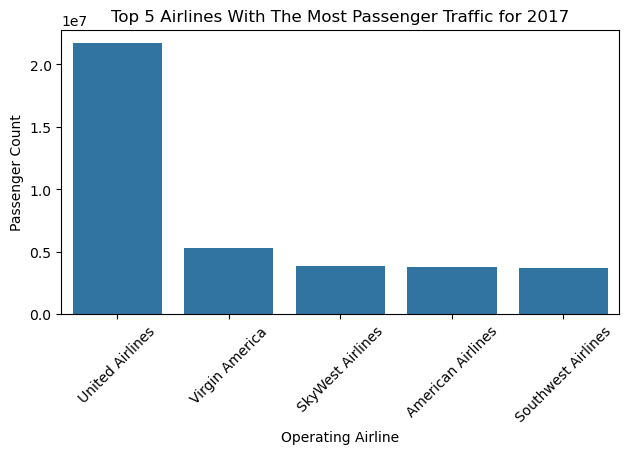

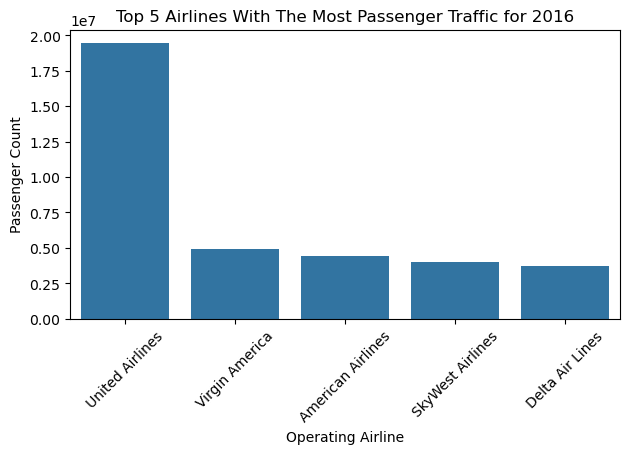

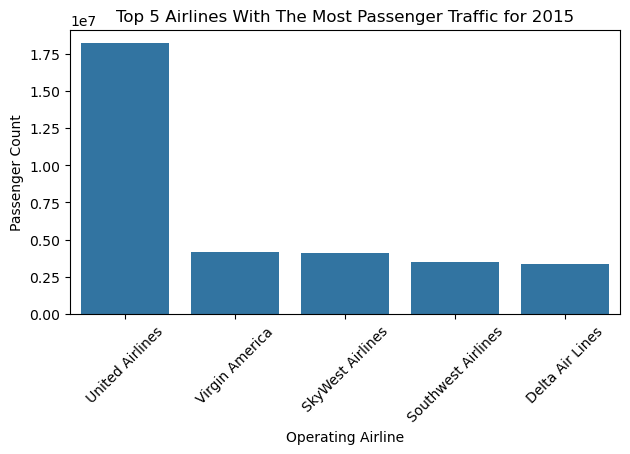

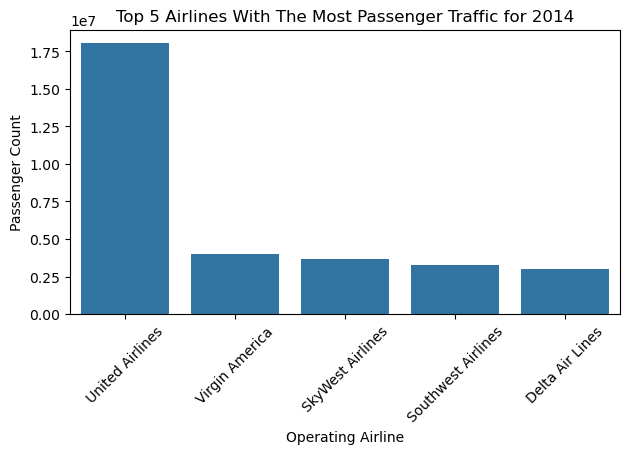

In [13]:
# Group the passenger count by operating airline and get the sum of passengers for each airline
sorted_air_df = air_df.groupby(['Operating Airline', 'Year'], as_index = False)['Passenger Count'].sum()

# Sort the data frame to order it by year and passenger count to get the top 5 airlines for each year
sorted_air_df = sorted_air_df.sort_values(['Year', 'Passenger Count'], ascending = False)

# Get the last 10 years
sorted_year = sorted_air_df.sort_values(['Year', 'Passenger Count'], ascending = False)['Year']
sorted_year.drop_duplicates(inplace=True)
last_10_years = list(sorted_year.head(10))

# Check getting the last 10 years worked
print(last_10_years)

# Go through each of the last 10 years to create a chart
for year in last_10_years:
    
    # Get the top 5 airlines for each year based on most passenger traffic
    top_5_airlines = sorted_air_df[sorted_air_df['Year'] == year].head(5)
    
    # Graph the chart
    sns.barplot(x = 'Operating Airline', y = 'Passenger Count', data = top_5_airlines)
    plt.title(f'Top 5 Airlines With The Most Passenger Traffic for {year}')
    plt.xticks(rotation = 45)
    plt.xlabel('Operating Airline')
    plt.ylabel('Passenger Count')
    plt.tight_layout()
    plt.show()

The charts for the last 10 years show a trend in the operating airline with the highest passenger count. Throughout the last 10 years, the operating airline with the biggest passenger count is United Airlines. They have been consistent with the number of passengers for the last 10 years, being over 1.75 for all 10 years.  Skywest Airlines was part of the top 5 airlines for the last 10 years as well. While they don't reach United Airline's passenger numbers, their consistent ranking may suggest a stable position in the airline market. Delta and American Airlines has frequently appeared in the top 5 across the past 10 years as well, which may indicate their stability in the market as well. However, for certain years, 2017 for Delta Airlines and 2015-2015 for American, they were not included in the top 5 airlines with the most passenger traffic. This may indicate some change in their airline policy or prices that may have affected the number of passengers that flew with them. All the other airlines, besides United Airlines, have around similar numbers of passenger counts over the last 10 years. As no airline has consistenly taken the same spots for the top 2nd to 5th, it may indicate their is competition within the airline market for the most number of passengers, as many airkines have similar passenger numbers.

## Question 5
Extract data from 2003 to 2018 (inclusive), for all passengers who deplaned the aircraft in May e.g. May 2003, May 2004, May 2005 etc. Visualize the extracted data, using a line chart, and comment on the trend.

       Activity Period Activity Period Start Date Operating Airline  \
4690            200301                 2003-01-01      ATA Airlines   
4691            200301                 2003-01-01      ATA Airlines   
4694            200301                 2003-01-01        Air Canada   
4695            200301                 2003-01-01        Air Canada   
4696            200301                 2003-01-01         Air China   
...                ...                        ...               ...   
27676           201812                 2018-12-01   United Airlines   
27677           201812                 2018-12-01   Virgin Atlantic   
27678           201812                 2018-12-01   Virgin Atlantic   
27679           201812                 2018-12-01  Volaris Airlines   
27680           201812                 2018-12-01  Volaris Airlines   

      Operating Airline IATA Code Published Airline  \
4690                           TZ      ATA Airlines   
4691                           TZ    

/var/folders/0d/lcln3s9j3r970bj4t363blr80000gn/T/ipykernel_71732/4256222046.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_year['Month'] = filtered_year['Activity Period Start Date'].dt.month


Text(0.5, 1.0, 'May Deplaned Passengers By Year For 2003-2018')

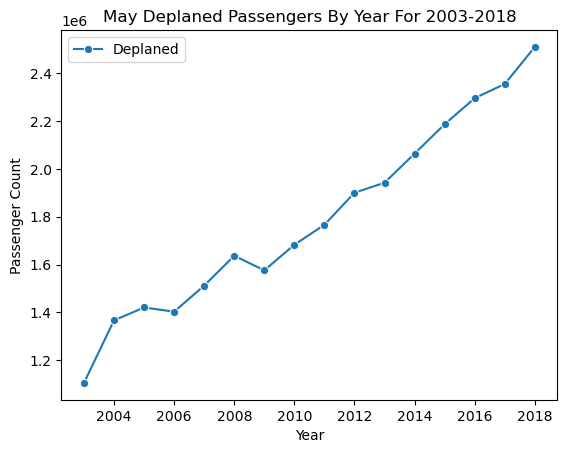

In [16]:
# Filter the data to only get data from 2003 to 2018 (inclusively)
filtered_year = air_df[(air_df['Year'] >= 2003) & (air_df['Year'] <= 2018)]# geeksforgeeks filter df with multiple conditions

# Check if filtering worked correctly
print(filtered_year)  

# Get the months of each flight
filtered_year['Month'] = filtered_year['Activity Period Start Date'].dt.month

# Filter by only May for the years 
filtered_by_may =  filtered_year[(filtered_year['Month'] == 5) & (filtered_year['Activity Type Code'] == 'Deplaned')]

# Group the passenger count by year to get the sum for each year for may
filtered_by_may_sum = filtered_by_may.groupby('Year')['Passenger Count'].sum().reset_index()

# Plot the line chart
plt.tight_layout()
sns.lineplot(x = 'Year', y = 'Passenger Count', marker='o',data = filtered_by_may_sum, label = 'Deplaned')
plt.title('May Deplaned Passengers By Year For 2003-2018')

The line plot shows a clear upward trend in the number of deplaned passengers from 2003 to 2018. Over this period, the passenger count consistently increases, with some fluctations in certain years (2006-2007 & 2009-2010). The overall trend suggests a steady rise in passenger traffic, indicating that more people are flying over time during May in the observed years. The growth appears to accelerate after 2010, leading to the highest passenger coint in 2018.

## Question 6
Predict the passenger count for May 2019 and May 2020, using simple linear regression. Ensure that you visualize the original data and also include the predictions from the model. Compare the predicted passenger count with the actual passenger count. In your explanation, discuss how close/far your predictions are from the actual values.


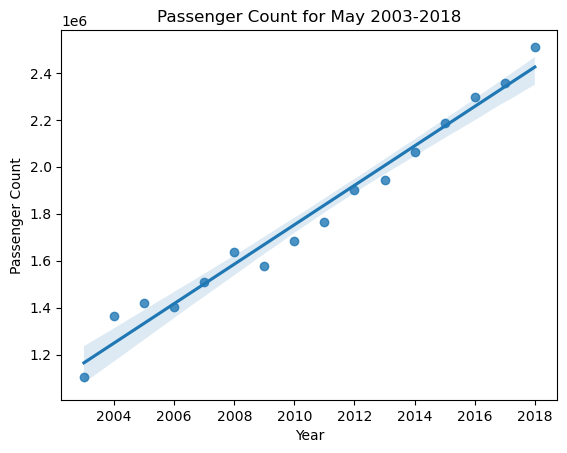

[[2508690.05000001]
 [2592643.09999999]]


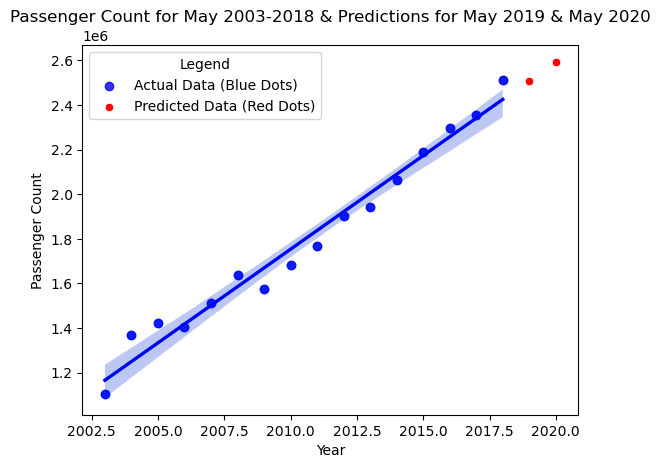

The predicted number of passengers for May 2019: 2508690
The predicted number of passengers for May 2020: 2592643
The actual number of passengers for May 2019: 2494705
The actual number of passengers for May 2020: 141789
The difference between predicted and actual passengers for May 2019: 13985
The difference between predicted and actual passengers for May 2020: 2450854


In [19]:
# import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a simple linear regression plot
sns.regplot(data = filtered_by_may_sum, x = 'Year', y = 'Passenger Count', label='Actual Data (Blue Dots)')
plt.title('Passenger Count for May 2003-2018')
plt.show()

X = filtered_by_may_sum['Year'].to_numpy()
X = X.reshape(-1,1)

y = filtered_by_may_sum['Passenger Count'].to_numpy()
y = y.reshape(-1,1)

lr_model = LinearRegression(fit_intercept=True)
lr_model = lr_model.fit(X,y)

# Make a prediction using the data from May 2003-2018 for May 2019 & May 2020
num_passengers = np.array([2019, 2020]).reshape(-1,1)
predictions = lr_model.predict(num_passengers)
print(predictions)

# Visualize the prediction
fig = plt.figure()
sns.regplot(data = filtered_by_may_sum, x = 'Year', y = 'Passenger Count')
sns.regplot(data=filtered_by_may_sum, x='Year', y='Passenger Count', color='blue', label='Actual Data (Blue Dots)')
sns.scatterplot(x=[2019, 2020], y = predictions.flatten(), color = 'red', label='Predicted Data (Red Dots)') #geeksforgeeks flatten array
plt.title('Passenger Count for May 2003-2018 & Predictions for May 2019 & May 2020')
plt.legend(title="Legend", loc='best')  
plt.show()

# Get the actual values for May 2019 & May 2020
actual_2019 = air_df[(air_df['Activity Period'] == 201905) & (air_df['Activity Type Code'] == 'Deplaned')]['Passenger Count'].sum()
actual_2020 = air_df[(air_df['Activity Period'] == 202005) & (air_df['Activity Type Code'] == 'Deplaned')]['Passenger Count'].sum()

# Compare the difference between the predicted and actual passenger count
pred_2019 = predictions[0][0]
pred_2020 = predictions[1][0]

print(f'The predicted number of passengers for May 2019: {pred_2019:.0f}')
print(f'The predicted number of passengers for May 2020: {pred_2020:.0f}')

print(f'The actual number of passengers for May 2019: {actual_2019}')
print(f'The actual number of passengers for May 2020: {actual_2020}')

# Calculate the differences
difference_2019 = pred_2019 - actual_2019
difference_2020 = pred_2020 - actual_2020

print(f'The difference between predicted and actual passengers for May 2019: {difference_2019:.0f}')
print(f'The difference between predicted and actual passengers for May 2020: {difference_2020:.0f}')

The prediction for May 2019 was quite accurate, with a predicted value of 2,508,690 passengers compared to an actual count of 2,494,705, resulting in a small difference of 13,985. This indicates that the model captured the historical trend well. However, the prediction for May 2020 significantly overestimated the actual count, with a predicted value of 2,592,643 passengers compared to an actual count of just 141,789, leading to a difference of 2,450,854. This large discrepancy is due to the model being trained on data from normal years (2003-2018) and unable to account for the drastic drop in air travel that may be caused by the COVID-19 pandemic, revealing the limitation of linear regression in predicting outcomes during unforeseen events.

## Question 7
Calculate the R-squared and explain what this tells you about the model.

In [22]:
# Calculate R-squared
r_squared = lr_model.score(X,y)
print(f'R-Squared: {r_squared:.2f}')

R-Squared: 0.98


An R-squared value of 0.98 indicates that the linear regression model explains 98% of the variation in passenger counts during the training period (May 2003-2018), suggesting a strong fit to the historical data. However, while this high R-squared demonstrates that the model captures the trend well, it does not guarantee accurate predictions for future values, particularly in the face of external factors.

## Question 8
This is a challenge question that may require some research. Choose ONE of the following:
Visualize the residuals of the regression model in question 6 and explain the chart.
Note: A residual is the difference between the actual and predicted values.


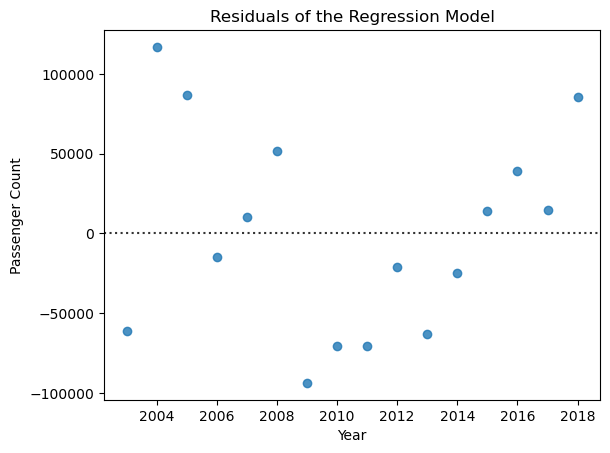

In [25]:
# Get the residuals of the regression model
sns.residplot(x = 'Year', y = 'Passenger Count', data = filtered_by_may_sum)
plt.title('Residuals of the Regression Model')
plt.show()

The graph shows the residuals, the difference between the actual and predicted number of passengers. The chart shows larger residuals from 2004 to 2008, with more stable values around 2010, followed by increasing positive residuals after 2014, which may indicate some changes in prediction accuracy or passenger trends. This means that the actual passenger count was higher than the predicted when the values were positive. Others had negative residual values which meant that the actual passenger count was lower than the predicted. 

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
